In [5]:
import numpy as np
import matplotlib.pyplot as plt

#### Driven population

Text(0, 0.5, 'y')

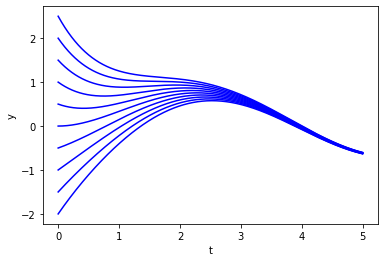

In [6]:
def eulerDrivenPop(y0,dt=0.001):
    t0, tf = 0, 5
    t= np.arange(t0, tf,dt);    
    y = np.zeros_like(t)
    y[0]=y0
    for i in range(1,len(t)):
        y[i] = dt * (-y[i-1] + np.sin(t[i-1]) ) + y[i-1]
    return t,y


y0a = np.arange(-2,3,.5)

for y0 in y0a:
    t,y = eulerDrivenPop(y0,dt=0.001)
    plt.plot(t,y, 'b')
    
plt.xlabel("t")
plt.ylabel("y")



#### Time-dependent coefficients

Text(0, 0.5, 'y')

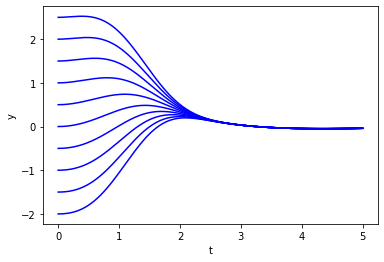

In [7]:
def eulerTimeCoef(y0,dt=0.001):
    t0, tf = 0, 5
    t= np.arange(t0, tf,dt);    
    y = np.zeros_like(t)
    y[0]=y0
    for i in range(1,len(t)):
        y[i] = y[i-1] + dt * (-y[i-1]*t[i-1]**2 + np.sin(t[i-1]) )
    return t,y


y0a = np.arange(-2,3,.5)

for y0 in y0a:
    t,y = eulerTimeCoef(y0,dt=0.001)
    plt.plot(t,y, 'b')
    
plt.xlabel("t")
plt.ylabel("y")




#### Bernoulli: NL 1st order ODE

Text(0, 0.5, 'y')

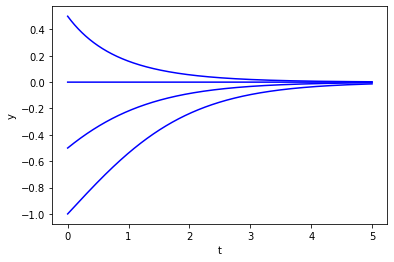

In [8]:
def bernoulli(y0,dt=0.001):
    t0, tf = 0, 5
    t= np.arange(t0, tf,dt);    
    y = np.zeros_like(t)
    y[0]=y0
    for i in range(1,len(t)):
        y[i] = y[i-1] - dt * (y[i-1] + 0.5 * y[i-1]**2 )
    return t,y


y0a = np.arange(-1 , 1,.5)

for y0 in y0a:
    t,y = bernoulli(y0,dt=0.001)
    plt.plot(t,y, 'b')
    
plt.xlabel("t")
plt.ylabel("y")





#### Nonlinear Oscillator

In [15]:
def nlOsc(x0,px0, dt=0.01, lam=1):
    t0, tf = 0, 10*np.pi
    t = np.arange(t0, tf,dt);    
    x_s = np.zeros_like(t); p_s = np.zeros_like(t)
    x_s[0], p_s[0] = x0, px0
 
    for n in range(1,len(t)):
        x_s[n] = x_s[n-1] + dt*p_s[n-1]
        p_s[n] = p_s[n-1] - dt*(x_s[n] + lam*x_s[n]**3)
#     E_euler = energy(x_s, p_s, lam=1)
    return t, x_s, p_s 


def energy(x, px, lam=1):    
    Nx=len(x); 
    x=x.reshape(Nx);        px=px.reshape(Nx);    
    E = 0.5*px**2 + lam*(1 - np.cos(x))
    E = E.reshape(Nx)
    return E

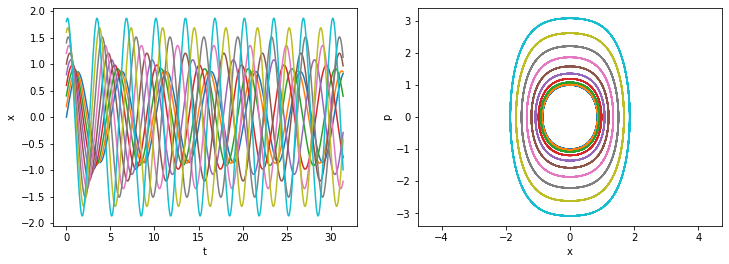

In [24]:
plt.figure(figsize=[12,4])
p0=1
x0a = np.arange(0 , 2, .2)

for x0 in x0a:
    t,x,p = nlOsc(x0,p0,dt=0.001)
    
    plt.subplot(1,2,1)
    plt.plot(t,x)
    
    plt.xlabel("t")
    plt.ylabel("x")

    plt.subplot(1,2,2)
    plt.plot(x,p)
    plt.axis('equal')
    plt.xlabel("x")
    plt.ylabel("p")



### New Problem


In [10]:

def nlOsc(x0,px0, dt=0.01, lam=1):
    t0, tf = 0, 10*np.pi
    t = np.arange(t0, tf,dt);    
    x_s = np.zeros_like(t); p_s = np.zeros_like(t)
    x_s[0], p_s[0] = x0, px0
 
    for n in range(1,len(t)):
        x_s[n] = x_s[n-1] + dt*p_s[n-1]
        p_s[n] = p_s[n-1] - dt*(x_s[n] + lam*x_s[n]**3)
#     E_euler = energy(x_s, p_s, lam=1)
    return t, x_s, p_s 


def energy(x, px, lam=1):    
    Nx=len(x); 
    x=x.reshape(Nx);        px=px.reshape(Nx);    
    #E = 0.5*px**2 + lam*(1 - np.cos(x))
    E = (1/2)*p**2 - 3*x**2 + (21/4)*x**4
    E = E.reshape(Nx)
    return E

<ipython-input-11-b5cdd78200ee>:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(1,2,1)
<ipython-input-11-b5cdd78200ee>:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(1,2,2)
<ipython-input-11-b5cdd78200ee>:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and retu

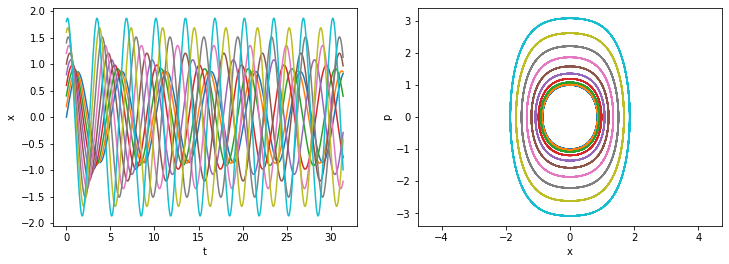

In [11]:
plt.figure(figsize=[12,4])
p0=1
x0a = np.arange(0 , 2, .2)

for x0 in x0a:
    t,x,p = nlOsc(x0,p0,dt=0.001)
    
    plt.subplot(1,2,1)
    plt.plot(t,x)
    
    plt.xlabel("t")
    plt.ylabel("x")

    plt.subplot(1,2,2)
    plt.plot(x,p)
    plt.axis('equal')
    plt.xlabel("x")
    plt.ylabel("p")



In [ ]:
def hamiltonian3(x, p, lam = lam):
    return (1/2)*p**2 - 3*x**2 + (21/4)*x**4

def dual_loss(X , y, ydot, out_weights, force_t = None, 
                reg = True, ode_coefs = None, mean = True,
               enet_strength = None, enet_alpha = None, init_conds = None, lam = 1):
    y, p = y[:,0].view(-1,1), y[:,1].view(-1,1)
    ydot, pdot = ydot[:,0].view(-1,1), ydot[:,1].view(-1,1)
    
    #with paramization
    L =  (ydot - p)**2 + (pdot - 6*y + 21*y**3 )**2
    
    #if mean:
    L = torch.mean(L)
    
    if reg:
        #assert False
        weight_size_sq = torch.mean(torch.square(out_weights))
        weight_size_L1 = torch.mean(torch.abs(out_weights))
        L_reg = enet_strength*(enet_alpha * weight_size_sq + (1- enet_alpha) * weight_size_L1)
        L = L + 0.1 * L_reg 

    y0, p0 = init_conds
    ham = hamiltonian3(y, p)
    ham0 = hamiltonian3(y0, p0)
    L_H = ( ham - ham0).pow(2).mean()
    assert L_H >0

    L = L +  0.1 * L_H
    
    #print("L1", hi, "L_elastic", L_reg, "L_H", L_H)
    return L

